# Scientific Computing Using Python – Introduction

## Basic Scientific Computing Packages

<br/>
<div align="center">13th of June, 2023</div>
<br/>
<div align="center">
    Thomas Arildsen<br/>
    <a href="mailto:tari@its.aau.dk">tari@its.aau.dk</a>
<div/>
<br/>
<div align="center">
CLAAUDIA<br/>
Aalborg University
</div>

# Basic Scientific Computing Packages

## Agenda

  * Introduction
  * Vectors
  * NumPy Arrays
  * Vectorising Operations
  * More About Arrays
  * Pandas and Tabular Data
  * Visualising Data (Plotting Curves)
  * Data Storage
  * Additional Scientific Packages
  * Summary

# Introduction

## Scientific Computing

### Available functionality

  * So far, we have looked at basic Python functionality.
  * The Python “ecosystem” is rife with scientific computing functionality.
  * A few canonical packages form the backbone of scientific computing in Python.
  * In this part we will introduce you to the main functionality of some major workhorses.
  * We will introduce you briefly to a selection of additional packages that you can explore on your own.

### Efficient computing

  * Scientific computing often about large amounts of data.
  * We want to be able to compute efficiently **and** easily.

  * Python makes it easy, how about efficient?

  * `NumPy` to the rescue. Makes numerical computations on vectors, matrices etc. efficient (Matlab-like).
  * Knowing NumPy arrays can also help understand tensors in TensorFlow and PyTorch.

### Tabular data
- Often it is also useful to be able to handle tabular data; i.e. where the data are various fields (columns) that have a lot of observations (rows) of.
- NumPy can do this (in a crude way).
- Another tool, however, makes this somewhat more intuitive and is better suited for statistical and exploratory data analysis

- Pandas supplements NumPy very well in this area.

## Visualisation

### Visual perception

  * As you can probably recognise from yourselves, we as humans are quite visually oriented in the way we perceive the world around us.
  * Reading through a large amount of numbers (list, table etc.) does not give us a very good overview of the data or ability to compare the numbers.
  * Therefore it usually makes most sense for us to visualise (plot) the data we want to study.
  * So, today we will also introduce ways of plotting data and what to be aware of when doing so in Python.

## Storage

### Storing data

* In addition to computing on large amounts of data, we of course also need to be able to store and load the data.
* There are Python facilities for doing this efficiently.
* Interface to industry-standard storage format for larger-scale data storage needs.

## Additional Scientific Functionality

### More specialised packages

* In various areas of research we typically have more specilised types of operations, analyses etc. that we need to perform.
* Python packages for a large part of such functionality as well.
* Can be extended through a large number of specialised add-on packages (e.g. for machine learning, differential equations, image processing etc.).

## Also note

*Several of the scripts in this presentation have been built from examples in the book: Hans Petter Langtangen, "A Primer on Scientific Programming with Python", available at http://hplgit.github.io/scipro-primer/*

## Intended learning outcomes

### After today’s course you will have knowledge about:

* Basics of vectors and matrices and operations on these.
* Using (NumPy) arrays in Python.
* Vectorising operations in Python.
* Using Pandas Series and Dataframes.
* Visualising tabular data in Pandas.
* Visualising data more generally in Seaborn.
* Storing/loading data efficiently to/from disk.
* Overview of additional scientific packages.

### You will be able to:

* Generate and process data in (NumPy) arrays.
* Load and process data in Pandas.
* Plot the data in various ways.
* Store/load numerical data to/from disk.

# Vectors

## Recapitulating vector basics

* I assume you are all very familiar with vectors and matrices.

  Often seen as coordinates of points in 2, or maybe 3 dimensions

    $$\begin{align*}
      \begin{pmatrix}
        x & y
      \end{pmatrix}
      &&
      \begin{pmatrix}
        x\\
        y
      \end{pmatrix}
      &&
      \begin{bmatrix}
        x\\
        y
      \end{bmatrix}
      &&
      \begin{bmatrix}
        x\\
        y\\
        z
      \end{bmatrix} = \begin{bmatrix}
        x & y & z
      \end{bmatrix}^\mathsf{T}
    \end{align*}$$

### Vectors in Python – lists?

*Can* we use lists as vectors in Python?

Yes

In [1]:
def f(x):
    return x**3       # Sample function

n = 5
dx = 1.0/(n-1)
xlist = [i*dx for i in range(n)]
ylist = [f(x) for x in xlist]
pairs = [[x, y] for x, y in zip(xlist, ylist)]
pairs

[[0.0, 0.0], [0.25, 0.015625], [0.5, 0.125], [0.75, 0.421875], [1.0, 1.0]]

But we should not! Why?

### Advantages/disadvantages of lists

Advantages

* Lists are very versatile. The elements can be a mixture of several different data types:

In [2]:
mylist = [2, 6.0, 'some text', [0,1]]

* You can add or remove elements (grow or shrink) anywhere in the list.

Disadvantages

* Slow.
* Memory-consuming.
* Limited mathematical operations on lists.

For the vector-like data, we do not need the advantages and we do not like the disadvantages. Now what?

# NumPy Arrays

## A data container for vector-like data

A more suitable alternative to lists for vector-like data is arrays.

* NumPy arrays – not standard Python arrays.
* We need the Numerical Python ([NumPy](http://www.numpy.org/)) package:

In [3]:
import numpy as np

* All entries must be of same type – preferably integer, floating-point, or complex for efficient computation.
* The size of the array (vector) is known and fixed when you create it (inefficient to change).
* Many operations in NumPy can be done directly on arrays – **vectorisation**.

## Basic construction

NumPy arrays (from now on just “arrays”) can be constructed in a number of ways.

* Convert from a list (not efficient but possible and convenient for small arrays)

In [8]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

* Create a zero array

In [9]:
n = 3
b = np.zeros(n)
b

array([0., 0., 0.])

* Create a zero array of specified type

In [10]:
c = np.zeros_like(a)
c

array([0, 0, 0])

In [12]:
c.dtype

dtype('int64')

* Create uniformly spaced values defined by number of values

In [13]:
d = np.linspace(1/3, 23.9, 12)
d

array([ 0.33333333,  2.47575758,  4.61818182,  6.76060606,  8.9030303 ,
       11.04545455, 13.18787879, 15.33030303, 17.47272727, 19.61515152,
       21.75757576, 23.9       ])

* Create range of numbers defined by spacing (usually integers)

In [15]:
e = np.arange(2, 18, 2)
e

array([ 2,  4,  6,  8, 10, 12, 14, 16])

## Indexing

Arrays are indexed the same way as lists and tuples

In [16]:
a[2]

3

* Slices

In [17]:
a[1:-1]


array([2])

* Indexed parts of an array are not copies of this part of the array

In [18]:
b = a[1:-1]
b[0] = 0
a

array([1, 0, 3])

In [19]:
np.copy?

Signature: np.copy(a, order='K', subok=False)
Docstring:
Return an array copy of the given object.

Parameters
----------
a : array_like
    Input data.
order : {'C', 'F', 'A', 'K'}, optional
    Controls the memory layout of the copy. 'C' means C-order,
    'F' means F-order, 'A' means 'F' if `a` is Fortran contiguous,
    'C' otherwise. 'K' means match the layout of `a` as closely
    as possible. (Note that this function and :meth:`ndarray.copy` are very
    similar, but have different default values for their order=
    arguments.)
subok : bool, optional
    If True, then sub-classes will be passed-through, otherwise the
    returned array will be forced to be a base-class array (defaults to False).

    .. versionadded:: 1.19.0

Returns
-------
arr : ndarray
    Array interpretation of `a`.

See Also
--------
ndarray.copy : Preferred method for creating an array copy

Notes
-----
This is equivalent to:

>>> np.array(a, copy=True)  #doctest: +SKIP

Examples
--------
Create an array

### More exotic ways of indexing
List (or array) of indices to index another array:

In [20]:
e

array([ 2,  4,  6,  8, 10, 12, 14, 16])

In [21]:
idx = [0 , 4 , 5 , -1]
e[idx]

array([ 2, 10, 12, 16])

Boolean indexing:

In [22]:
e > 6

array([False, False, False,  True,  True,  True,  True,  True])

In [23]:
e[e > 6]

array([ 8, 10, 12, 14, 16])

In [24]:
idxvals = np.where(e > 6)
e[idxvals]

array([ 8, 10, 12, 14, 16])

## Computing functions of array values

Now that we know about `NumPy` arrays, we can replace the example from previously and create arrays instead of lists:

In [25]:
xlist

[0.0, 0.25, 0.5, 0.75, 1.0]

In [26]:
ylist

[0.0, 0.015625, 0.125, 0.421875, 1.0]

In [27]:
n = 5
x2 = np.linspace(0,1,n)
x2

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

- `ylist` was created in a loop over the entries in `xlist`
- Looping over individual entries is not necessary using arrays - **vectorisation**

# Vectorising Operations

## Computing functions of array values – vectorisation

Looping through elements of the array to create it is slow.

* An advantage of arrays is that we can apply functions to them directly:

In [28]:
y2 = f(x2)
y2

array([0.      , 0.015625, 0.125   , 0.421875, 1.      ])

* Builds on vector arithmetic.
* How? `NumPy` provides implementations of mathematical functions that support arrays as input.

## Exercise - NumPy array vectorisation

This code computes a function over a sequence of $x$-values in a **scalar** way by looping through the elements of an array (inefficient):

In [51]:
from math import sin, cos, exp

n = 5
step = 1/(n-1)
r = []
x = 0

# Loop over elements
for i in range(n):
    value = sin(x) * cos(x) * exp(-x**2) + 2 + x**2
    r.append(value)
    x += step
r

[2.0,
 2.2876893068055875,
 2.577669130950128,
 2.846677755561096,
 3.167255914619631]

* Vectorise the above code using NumPy, avoid the loop
Hints:
* Turn the $x$-values into an array of values
* Apply the operations directly on the $x$ *array*

In the exercise operating on the entire array in one iteration:

* The code example fills in the entire array.
* Referred to as **vectorised** code – the various operations operate on the entire array (vector).
* The program still loops through the values of the array, but this happens “under the hood” inside efficient compiled C or Fortran code inside `NumPy` (fast).

## When does code work in vectorised form?

Can we just take any existing (scalar) Python code and use it for array-valued input as well?

* To a large extent – yes.
* Import the necessary mathematical functions from the `numpy` module instead of, e.g., the math module.
* `numpy`’s implementations of the functions support array arguments.
* If the function in question contains conditional statements (`if`), these parts must be re-written to support arrays.

Scalar function:

In [ ]:
def sign(x):
    if x < 0:
        return -1
    else:
        return 1

In [ ]:
sign(-5)

Vector trouble:

In [ ]:
sign(a)

Solution for conditional scalar functions:
- Either re-write function cleverly - (boolean) arithmetic instead of conditionals:

In [ ]:
def sign_vec(x):
    return (x >= 0) * 2 - 1

In [ ]:
sign_vec(a)

- The easy way out:

In [ ]:
sign_vec2 = np.vectorize(sign)

In [ ]:
sign_vec2(a)

# More About Arrays

## More details

* Arrays are not just one-dimensional (vectors). They can be 2- or higher-dimensional as well (matrices, or tensors more generally).
* They can be indexed like lists:

In [87]:
table = np.arange(2*3*4*5).reshape((2,3,4,5))
table

array([[[[  0,   1,   2,   3,   4],
         [  5,   6,   7,   8,   9],
         [ 10,  11,  12,  13,  14],
         [ 15,  16,  17,  18,  19]],

        [[ 20,  21,  22,  23,  24],
         [ 25,  26,  27,  28,  29],
         [ 30,  31,  32,  33,  34],
         [ 35,  36,  37,  38,  39]],

        [[ 40,  41,  42,  43,  44],
         [ 45,  46,  47,  48,  49],
         [ 50,  51,  52,  53,  54],
         [ 55,  56,  57,  58,  59]]],


       [[[ 60,  61,  62,  63,  64],
         [ 65,  66,  67,  68,  69],
         [ 70,  71,  72,  73,  74],
         [ 75,  76,  77,  78,  79]],

        [[ 80,  81,  82,  83,  84],
         [ 85,  86,  87,  88,  89],
         [ 90,  91,  92,  93,  94],
         [ 95,  96,  97,  98,  99]],

        [[100, 101, 102, 103, 104],
         [105, 106, 107, 108, 109],
         [110, 111, 112, 113, 114],
         [115, 116, 117, 118, 119]]]])

In [88]:
table[1,0,1,1]

66

* They are usually indexed using this more convenient notation:

In [54]:
table[1,1]

3

In [55]:
table.shape

(2, 2)

* We can inspect the “size” of an array, i.e. the number of elements along each dimension of the array, using `table.shape`

* We can think of a one-dimensional array as a vector and a two-dimensional array as a matrix.
* Multiplication `A * B` means entry-wise multiplication.
* If we want matrix multiplication between arrays representing vectors and/or matrices, we need to use `np.dot()` or `@` - **in Python >= 3.5**.

In [81]:
A = 2 * np.ones((2,2))
A[1,:] = 5
A

array([[2., 2.],
       [5., 5.]])

In [82]:
B = 3 * np.ones((2,2))
B[:,1] = 4
B

array([[3., 4.],
       [3., 4.]])

In [83]:
A * B

array([[ 6.,  8.],
       [15., 20.]])

In [84]:
A @ B

array([[12., 16.],
       [30., 40.]])

### A bit more matrix fun (linear algebra)

- Transpose:

In [90]:
table.shape

(2, 3, 4, 5)

In [91]:
table.T.shape

(5, 4, 3, 2)

- Inverse:

In [93]:
np.linalg.inv(A)

array([[ 9.00719925e+15, -3.60287970e+15],
       [-9.00719925e+15,  3.60287970e+15]])

In [94]:
c = np.arange(1,10)
C = c.reshape((3,3))
C

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [99]:
D = c.reshape((3,3),order='F')
D

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [100]:
D.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [128]:
# slice of C means data in not contigous
E = C[0:2:, 0:2]
E.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [127]:
# To work with a slice in contigous manner, make copy of slice
F = np.copy(E)
F.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

- The layout of data in memory can be important in terms of computational performance, i.e. how fast computations execute due to the time it takes to fetch data from memory.
- Take this into consideration if optimising code for speed.

In [101]:
c.reshape((3,3),order='C')

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

## Exercise - data orientation

- Create two (1000 x 1000) arrays A and B (filled with for example `arange`)
- Create A with data filled in row-wise
- Create B with data filled in column-wise
- Compute the matrix product $A\cdot B$ and time how long it takes (`%timeit` in the IPython interpreter)
- Compute the matrix product $B\cdot A$ and time how long it takes (`%timeit` in the IPython interpreter)
- Compare the difference. What do you observe? What is the reason?

In [137]:

A = np.arange(1000*1000).reshape(1000,1000, order = "C")
B = np.arange(1000*1000).reshape(1000,1000, order = "F")

In [141]:
%%timeit
A @ B

1.07 s ± 3.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [142]:
%%timeit
B @ A

2.95 s ± 30.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Example of checking near-equality
Related to floating-point details later today

In [143]:
import numpy as np

N, M, K, L = 60, 50, 800, 80

In [144]:
A = np.random.random((M,K))
B = np.random.random((K,L))
C = np.random.random((L,N))

In [145]:
R1 = (A.dot(B)).dot(C)

In [146]:
R2 = A.dot(B.dot(C))

In [147]:
R1 == R2

array([[False, False, False, ..., False,  True, False],
       [ True,  True, False, ..., False,  True,  True],
       [False, False,  True, ...,  True, False, False],
       ...,
       [False, False,  True, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ...,  True,  True, False]])

In [148]:
np.allclose(R1,R2)

True

### Complex numbers

Sometimes we need to specify complex numbers in Python:

In [149]:
number = 1 + 5j
number

(1+5j)

In [150]:
number = complex(1, 5)
number

(1+5j)

In [151]:
numbers = np.ones(3, dtype=complex)
numbers

array([1.+0.j, 1.+0.j, 1.+0.j])

## Random numbers

We often need random numbers for Monte Carlo simulation, to
generate test data, randomise experimental set-ups etc.

* NumPy also has a module random providing functions for generating random numbers. Some of the basic generators:
  * Integers
  * Uniform random numbers
  * Gaussian (normal) random numbers
* Many more distributions in `numpy.random` ([documentation](https://numpy.org/doc/1.20/reference/random/generator.html#distributions)).

### Generating random numbers

Set up generator and draw numbers

In [152]:
import numpy as np
N = 500
a = 3
b = 7

rng = np.random.default_rng()

y2 = rng.integers(a, b, N)

Plot the numbers to check

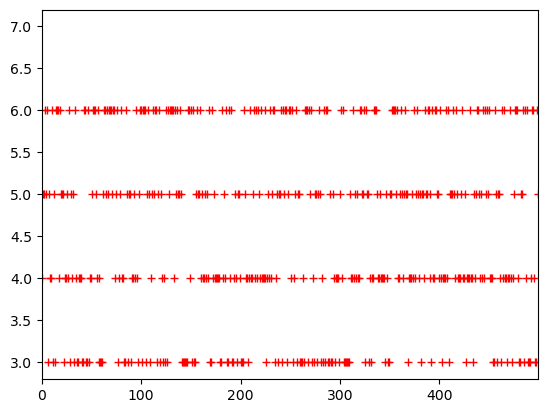

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(y2, 'r+')
_ = plt.axis([0,N-1,2.8,7.2])

### Other kinds of random numbers

Random numbers from other distributions are drawn similarly, using other functions from the generator:

In [ ]:
rng.random(10)  # Uniform between 0 and 1 (exclusive)

In [ ]:
rng.normal(0, 1, 10)  # Normal / Gaussian

# Storing Data to Files

NumPy `savetxt`/`loadtxt`

* NumPy provides a simple solution for storing/loading data.
* Storage as text files $\rightarrow$ human-readable, easier overview of contents, debugging etc.

### Saving data

* `numpy.savetxt` can be used to save data.
* Use as:
```python
numpy.savetxt(fname,
                X,
                fmt='%.18e',
                delimiter=' ',
                newline='\n',
                header='',
                footer='',
                comments='# ')
```
* Can automatically save in gzipped format: add “.gz” file name postfix.

Let us try it...

In [154]:
import numpy as np

data = np.random.normal(size=(3,3))
data

array([[-1.3428147 , -3.3552393 ,  0.17530548],
       [ 1.77155445,  0.59979419, -1.31339501],
       [ 0.06089519,  1.16125226, -0.13112536]])

Simply saving, standard options (basically stores as CSV):

In [155]:
np.savetxt('data1.txt',data)

- You can specify more arguments to `savetxt` to customise the format of data stored to file - for example to use comma as delimiter like proper CSV files.

Saving in gzipped format:

In [156]:
np.savetxt('data1.txt.gz',data)

### Loading data

* `numpy.loadtxt` can be used to load data saved with `numpy.savetxt`.
* Use as:

```python
numpy.loadtxt(fname,
                dtype=<type 'float'>,
                comments='#',
                delimiter=None,
                converters=None,
                skiprows=0,
                usecols=None,
                unpack=False,
                ndmin=0)
```
* Can automatically load in gzipped format.

Let us try it...

In [157]:
import numpy as np

data = np.loadtxt('data1.txt')
data

array([[-1.3428147 , -3.3552393 ,  0.17530548],
       [ 1.77155445,  0.59979419, -1.31339501],
       [ 0.06089519,  1.16125226, -0.13112536]])

Load data from gzipped file

In [158]:
data = np.loadtxt('data1.txt.gz')
data

array([[-1.3428147 , -3.3552393 ,  0.17530548],
       [ 1.77155445,  0.59979419, -1.31339501],
       [ 0.06089519,  1.16125226, -0.13112536]])

Picking certain columns

In [159]:
data = np.loadtxt('data1.txt',usecols=(0,2))
data

array([[-1.3428147 ,  0.17530548],
       [ 1.77155445, -1.31339501],
       [ 0.06089519, -0.13112536]])

"Unpacking" the array, i.e. storing individual columns of the data:

In [160]:
x, y, z = np.loadtxt('data1.txt',unpack=True)
x, y, z

(array([-1.3428147 ,  1.77155445,  0.06089519]),
 array([-3.3552393 ,  0.59979419,  1.16125226]),
 array([ 0.17530548, -1.31339501, -0.13112536]))

## More options

Other Numpy storage facilities

* `numpy.save` saves an array in binary format (`.npy` postfix).
* `numpy.savez` saves multiple arrays in binary files (`.npy`) inside a single non-compressed gzipped archive (.npz postfix).
* `numpy.savez_compressed` saves multiple arrays in binary files (`.npy`) inside a single compressed gzipped archive (`.npz` postfix).
* `numpy.load` loads data in binary format (`.npy` or `.npz` from the above functions or pickled files).

Look them up for details if you need them.

# Exercise

- Create an example matrix (array) $X$ of random integers in $[0,9]$ of size $1000 \times 10$
- Store the matrix (array) $X$ to a text file called "xdata.txt"
- Inspect the stored text file with a text editor to understand how the data has been stored
- Load columns 2, 3, and 7 of the matrix in "xdata.txt". Store these in three different variables.
- Now store the original matrix as a gzipped text file instead, called "xdata.txt.gz". Inspect the files to see if there is any difference in size.
- Also store the original matrix $X$ as a binary file (.npy) "xdata.npy". Inspect the files to see if there is any difference in size.

In [168]:
X = np.random.random_integers(0, 10, 1000*10).reshape(1000, 10)
np.savetxt("xdata.txt", X)

/tmp/ipykernel_1689/3667325968.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 10 + 1) instead
  X = np.random.random_integers(0, 10, 1000*10).reshape(1000, 10)


In [171]:
a, b, c = np.loadtxt("xdata.txt", usecols=(2,3,7), unpack=True)

In [174]:
a.shape

(1000,)

In [175]:
b.shape

(1000,)

In [176]:
c.shape

(1000,)

In [177]:
np.savetxt("xdata.txt.gz", X)

In [194]:
np.savez_compressed("xdata", X)

In [196]:
%ls  -al --block-size=K | grep xdata

-rw-r--r-- 1 shei shei   8K Jun 13 11:35 xdata.npz
-rw-r--r-- 1 shei shei 245K Jun 13 11:29 xdata.txt
-rw-r--r-- 1 shei shei  10K Jun 13 11:31 xdata.txt.gz
